In [8]:
from DbConn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")
plt.style.use('fivethirtyeight')

def twoweeks_dataframe():
    db=DbConn()
    
    select_query = '''
    select b.moviecd, b.audiacc,bt.genre ,bt.max_audiacc
    from boxoffice2 b 
    inner join movie2 bt
    on b.moviecd = bt.moviecd
    and b.opendt + 3 = b.dailydate
    '''
    select_result = pd.read_sql(select_query,db.connection)
    
    print("둘째 주 작업 완료-----------")
    db.disconnect()
    return select_result

In [9]:
dftws = twoweeks_dataframe()

둘째 주 작업 완료-----------


In [10]:
dftws.head()

,MOVIECD,AUDIACC,GENRE,MAX_AUDIACC
0,20197981,5194,애니메이션,5194
1,20183407,9742,드라마,9742
2,20196760,13548,다큐멘터리,17229
3,20192804,291342,스릴러,588958
4,20184572,1438520,범죄,2224338


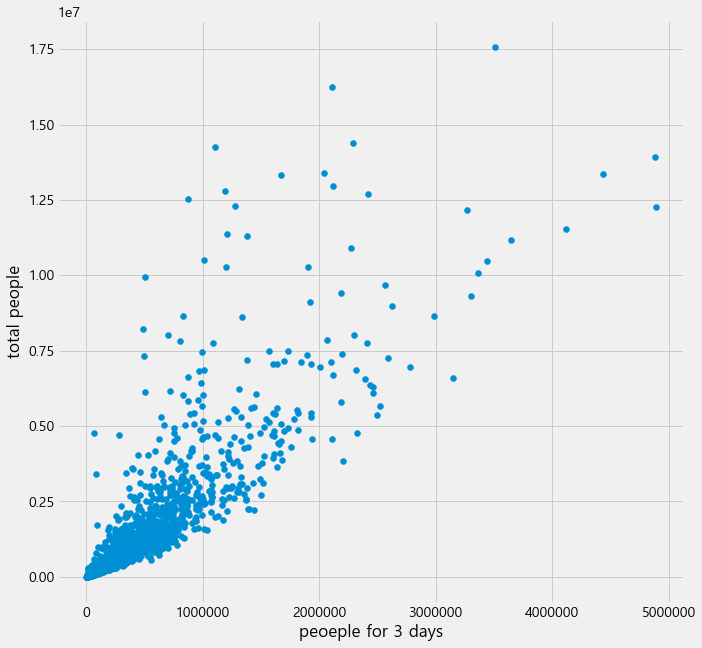

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(dftws['AUDIACC'],dftws['MAX_AUDIACC'])
plt.xlabel('peoeple for 3 days')
plt.ylabel('total people')
plt.grid
plt.show()

In [12]:
import seaborn as sns

In [13]:
dftws1=dftws[['AUDIACC','MAX_AUDIACC']]

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


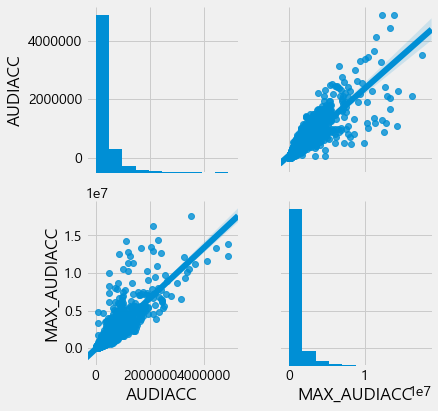

In [14]:
sns.pairplot(dftws1,kind='reg',height=3)# 페어플롯 작

In [15]:
#피었느 상관관계 분석 피어슨 상관게수는 두 변수간의 관련성을 구하기 위해 보편적으로 이용된다
#r 값은 x와 y가 완전히 동일함녀 +1 , 전혀다르면 0 ,반대방향으로 완전히 동일하면 -1 의 값을 가짐

![title](pearsonCor.png)

In [16]:
corr=dftws1.corr(method='pearson')
print(corr)

              AUDIACC  MAX_AUDIACC
AUDIACC      1.000000     0.874861
MAX_AUDIACC  0.874861     1.000000


In [17]:
genreList=['액션','드라마','범죄','애니메이션','코미디','사극','어드벤처','멜로/로맨스','스릴러','미스터리','공포(호러)','판타지','SF','다큐멘터리','전쟁','뮤지컬']

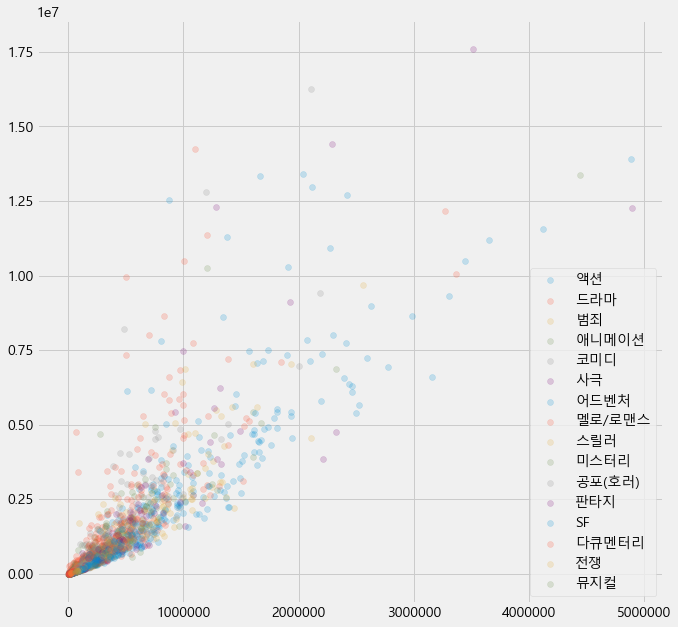

In [19]:
#장르가 드라마 것의 첫주 관객수
#장르가 드라마 것의 누적 관객수의 산점도
dftws2=dftws[['GENRE','AUDIACC','MAX_AUDIACC']]
plt.figure(figsize=(10,10))
for i in genreList:
    x = dftws2.loc[dftws2["GENRE"]== i,"AUDIACC"]
    y= dftws2.loc[dftws2["GENRE"]== i,"MAX_AUDIACC"]
    plt.scatter(x,y, alpha = 0.2, label = i, cmap= "plasma")
    plt.legend()